In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import fcluster
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import dendrogram

In [3]:
wine_data = pd.read_csv('wine.csv')
wine_data.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
X = wine_data.iloc[:, 1:].values

Euclidean Distance measure

In [5]:
def euclidean_distance(point_a, point_b):
    return np.sqrt(np.sum((point_a - point_b) ** 2))

# Task 1: k-means Clustering

In [6]:

# K-means clustering algorithm implementation
def kmeans_clustering(data_points, num_clusters, max_iterations=15):
    centroids = data_points[np.random.choice(data_points.shape[0], num_clusters, replace=False)]

    for iteration in range(max_iterations):
        # Step 1: Assign each point to the nearest centroid
        clusters = [[] for _ in range(num_clusters)]
        for point in data_points:
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            nearest_centroid_index = np.argmin(distances)
            clusters[nearest_centroid_index].append(point)

        # Step 2: Recalculate centroids as the mean of the points in each cluster
        new_centroids = np.array([np.mean(cluster, axis=0) if len(cluster) > 0 else centroids[i]
                                  for i, cluster in enumerate(clusters)])

        # If centroids don't change, stop the iteration
        if np.all(centroids == new_centroids):
            break

        # Update the centroids for the next iteration
        centroids = new_centroids

    # Calculate the Sum of Squared Errors (SSE) for the clustering result
    total_sse = 0
    for i, cluster in enumerate(clusters):
        for point in cluster:
            total_sse += euclidean_distance(point, centroids[i]) ** 2

    return total_sse

# Step 3: Test the K-means clustering for different values of 'k' (2 to 8)
sse_results = []
for k in range(2, 9):
    sse_value = kmeans_clustering(X, k)
    sse_results.append(sse_value)
    print(f"For k = {k}, after 15 iterations: SSE = {sse_value:.2f}")

For k = 2, after 15 iterations: SSE = 4545746.29
For k = 3, after 15 iterations: SSE = 2370689.69
For k = 4, after 15 iterations: SSE = 1341379.57
For k = 5, after 15 iterations: SSE = 1061573.28
For k = 6, after 15 iterations: SSE = 728377.48
For k = 7, after 15 iterations: SSE = 560021.24
For k = 8, after 15 iterations: SSE = 329655.42


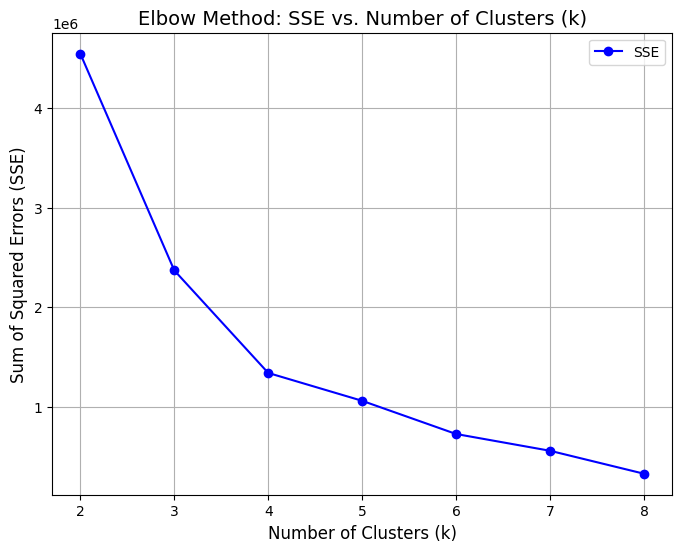

In [8]:
# Step 4: Plot the SSE values against the number of clusters 'k' to apply the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(2, 9), sse_results, marker='o', linestyle='-', color='b', label='SSE')
plt.title('Elbow Method: SSE vs. Number of Clusters (k)', fontsize=14)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Sum of Squared Errors (SSE)', fontsize=12)
plt.xticks(range(2, 9))
plt.grid(True)
plt.legend()
plt.show()

Addition: Choosing the K-value

In [13]:
def elbow_K_values(sse_results):
    sse_diff = []
    for i in range(1, len(sse_results)):
        sse_diff.append(sse_results[i] - sse_results[i-1])
    sse_diff2 = []
    for i in range(1, len(sse_diff)):
        sse_diff2.append(sse_diff[i] - sse_diff[i-1])
    sorted_indices = sorted(range(len(sse_diff2)), key=lambda i: sse_diff2[i], reverse=True)
    index = sorted_indices[2]

    return index + 1

elbow_k = elbow_K_values(sse_results)
print(f"The chosen k value based on the Elbow Method is: {elbow_k}")


The chosen k value based on the Elbow Method is: 4


# Task 2: Agglomerative Hierarchical Clustering


Performing Single Linkage Clustering...


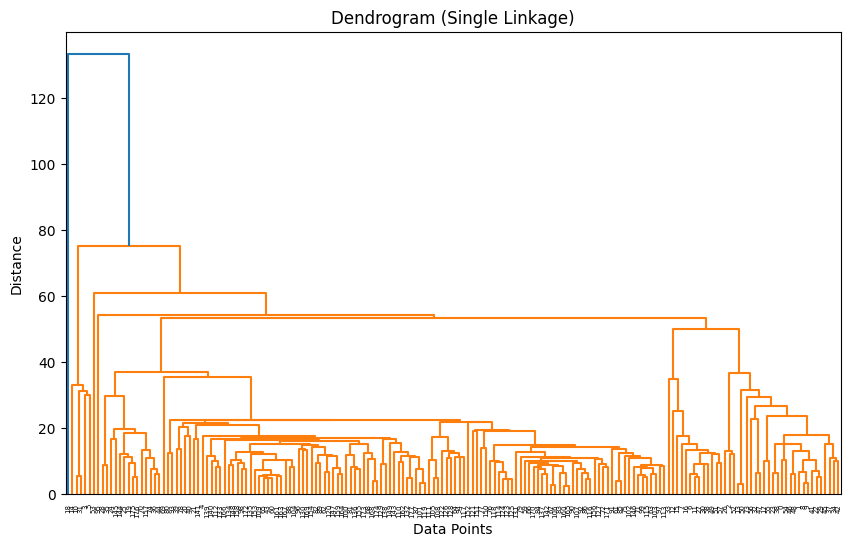

Silhouette Score (Single Linkage, k=3): 0.497

Performing Complete Linkage Clustering...


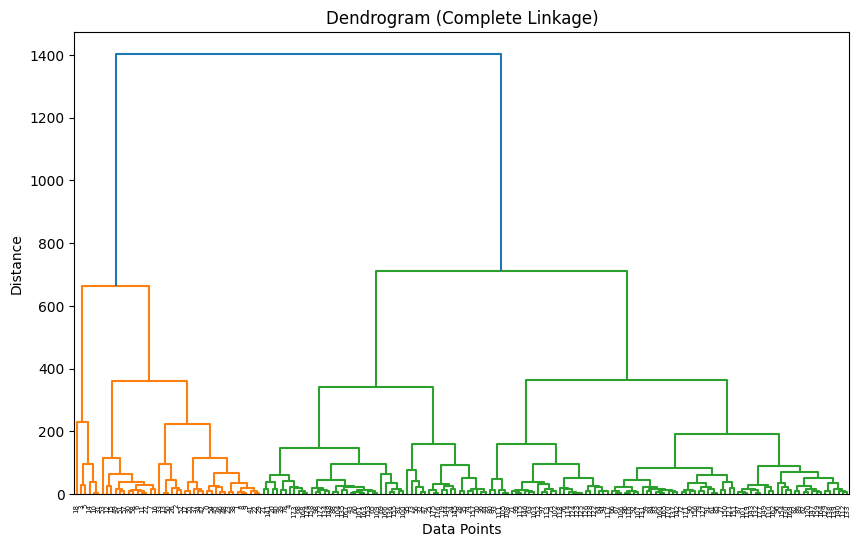

Silhouette Score (Complete Linkage, k=3): 0.550


In [21]:
# Compute the distance matrix using the custom Euclidean distance function
def compute_distance_matrix(X):
    n_samples = X.shape[0]
    distance_matrix = np.zeros((n_samples, n_samples))

    for i in range(n_samples):
        for j in range(i + 1, n_samples):
            dist = euclidean_distance(X[i], X[j])
            distance_matrix[i, j] = dist
            distance_matrix[j, i] = dist

    return distance_matrix

# Agglomerative Hierarchical Clustering
def agglomerative_clustering(X, linkage_method='single'):
    n_samples = X.shape[0]
    clusters = {i: [i] for i in range(n_samples)}
    distance_matrix = compute_distance_matrix(X)
    linkage_matrix = []

    while len(clusters) > 1:
        cluster_ids = list(clusters.keys())
        min_dist = np.inf
        closest_pair = None

        # Find the closest pair of clusters
        for i, c1 in enumerate(cluster_ids):
            for c2 in cluster_ids[i + 1:]:
                if linkage_method == 'single':
                    dist = min(
                        distance_matrix[idx1, idx2]
                        for idx1 in clusters[c1]
                        for idx2 in clusters[c2]
                    )
                elif linkage_method == 'complete':
                    dist = max(
                        distance_matrix[idx1, idx2]
                        for idx1 in clusters[c1]
                        for idx2 in clusters[c2]
                    )
                if dist < min_dist:
                    min_dist = dist
                    closest_pair = (c1, c2)

        # Merge the two closest clusters
        c1, c2 = closest_pair
        new_cluster = clusters[c1] + clusters[c2]
        new_cluster_id = max(clusters.keys()) + 1
        clusters[new_cluster_id] = new_cluster

        # Append to linkage matrix for dendrogram
        linkage_matrix.append([c1, c2, min_dist, len(new_cluster)])

        del clusters[c1]
        del clusters[c2]

    return np.array(linkage_matrix)

# Plot the dendrogram
def plot_dendrogram(linkage_matrix, method):
    plt.figure(figsize=(10, 6))
    dendrogram(linkage_matrix, labels=np.arange(len(X)))
    plt.title(f"Dendrogram ({method.capitalize()} Linkage)")
    plt.xlabel("Data Points")
    plt.ylabel("Distance")
    plt.show()

# Silhouette Score Calculation
def silhouette_score(X, labels):
    n_samples = len(X)
    silhouette_scores = np.zeros(n_samples)

    for i in range(n_samples):
        # Calculate intra-cluster distance (a)
        same_cluster = X[labels == labels[i]]
        a = np.mean(cdist([X[i]], same_cluster)[0]) if len(same_cluster) > 1 else 0

        # Calculate nearest cluster distance (b)
        other_clusters = [X[labels == l] for l in np.unique(labels) if l != labels[i]]
        b = np.min([np.mean(cdist([X[i]], oc)[0]) for oc in other_clusters])

        silhouette_scores[i] = (b - a) / max(a, b)

    return np.mean(silhouette_scores)

# Perform clustering and calculate silhouette score
for method in ['single', 'complete']:
    print(f"\nPerforming {method.capitalize()} Linkage Clustering...")
    linkage_matrix = agglomerative_clustering(X, linkage_method=method)
    plot_dendrogram(linkage_matrix, method)
    labels = fcluster(linkage_matrix, t=3, criterion='maxclust')
    silhouette_avg = silhouette_score(X, labels)
    print(f"Silhouette Score ({method.capitalize()} Linkage, k=3): {silhouette_avg:.3f}")
